# Introduction

## Heart Attack Prediction System

Heart disease is a leading cause of death worldwide. Early detection and prevention are crucial in reducing the risk and impact of heart attacks. This script is designed to predict the likelihood of a heart attack based on various medical and personal attributes provided by the user. The system uses a machine learning model trained on a dataset of patient information to make these predictions.

# How It Works

# Data Loading and Preprocessing:

The script starts by loading a dataset containing historical patient data, which includes various attributes such as age, gender, chest pain type, blood pressure, cholesterol levels, and more. The dataset is cleaned and prepared for training a machine learning model.


# Model Training:
A logistic regression model is trained using the historical data. This model learns the relationships between the input features and the likelihood of a heart attack.


# User Input:
The script then prompts the user to enter specific details about their health and personal information. These details include age, gender, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression, slope of peak exercise ST segment, number of major vessels colored by fluoroscopy, and thalassemia status.


# Prediction:
Using the trained model, the script predicts whether the user is likely to experience a heart attack and provides the probability of this prediction. The prediction is based on the user-provided data and the learned patterns from the historical dataset.

# Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, cohen_kappa_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
!pip install catboost
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.9 MB/s eta 0:00:00


# Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame

df= pd.read_csv('/content/HeartDisease.csv')
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.head(5)  # print first 5 rows of the dataset

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# print last 5 rows of the dataset

df.tail()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
df.shape

(303, 14)

In [ ]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# getting some info about the data
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [ ]:
# statistical measures about the data
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable

df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

<Axes: xlabel='target', ylabel='Count'>

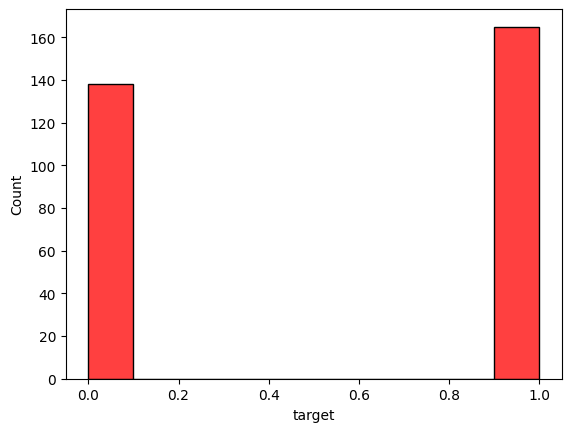

In [ ]:
sns.histplot(df['target'],color='red')

Text(0.5, 1.0, 'Target distribution')

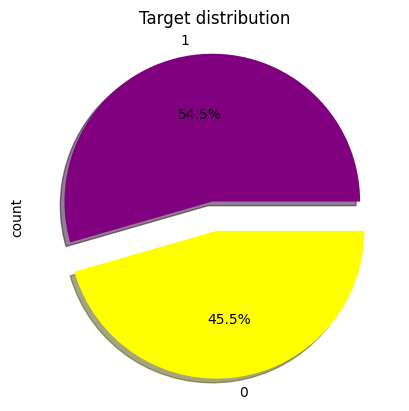

In [ ]:
df['target'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=['purple', 'yellow'],textprops = {'fontsize':10}).set_title("Target distribution")

In [ ]:
# drop duplicates
df.drop_duplicates()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.columns


Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

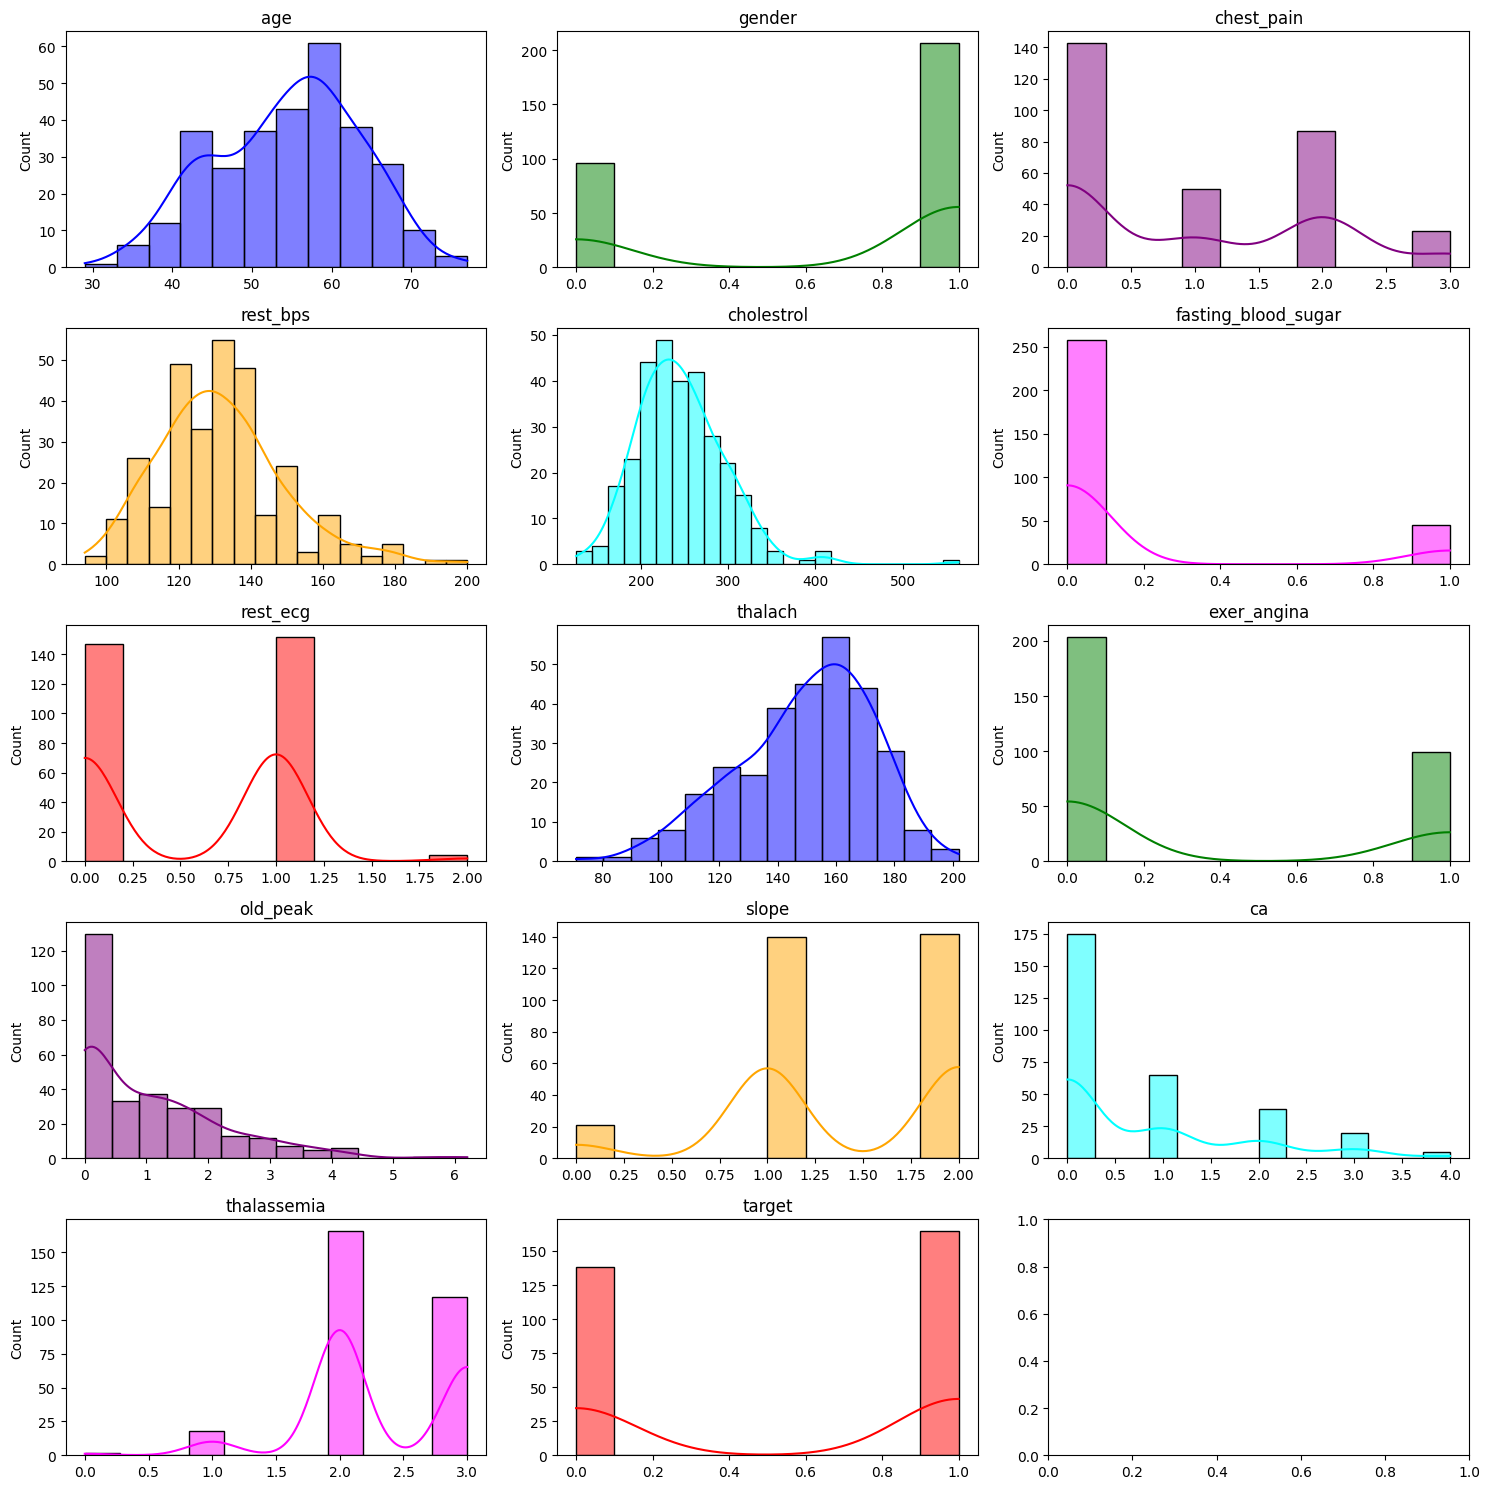

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color=colors[i % len(colors)])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

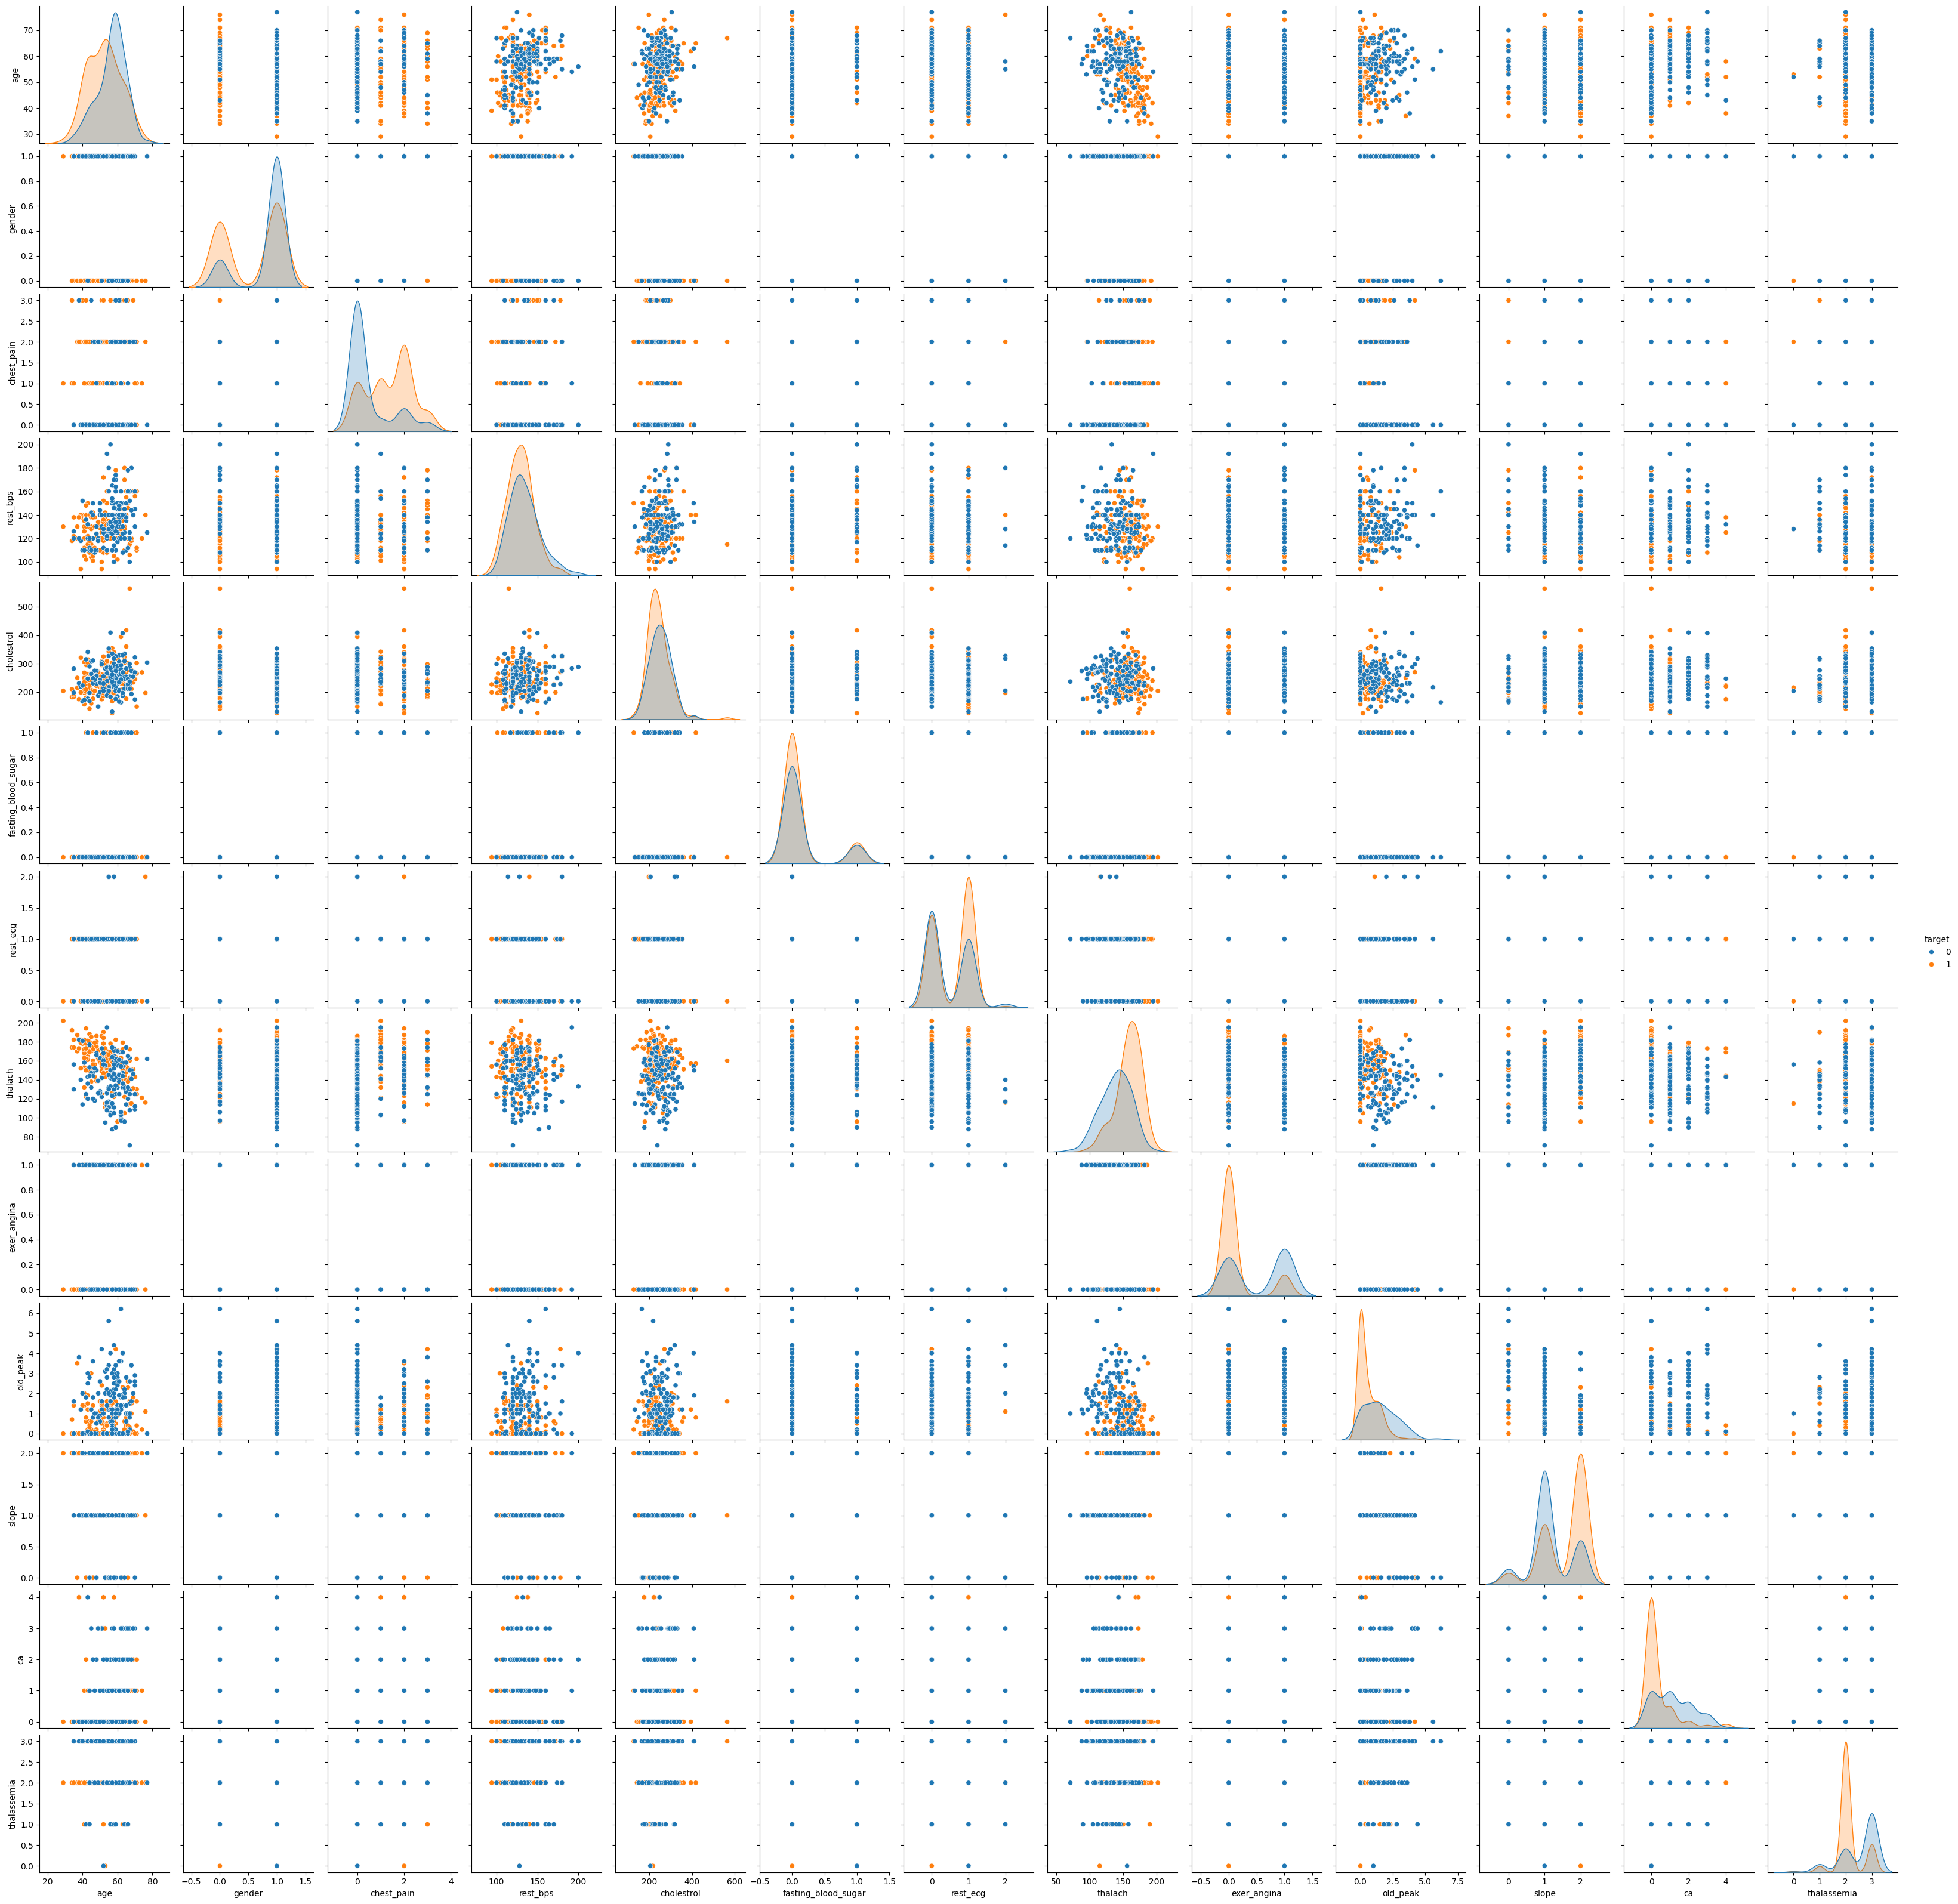

In [ ]:
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']
sns.pairplot(df, hue='target') # Use 'hue' to specify the column to determine colors

In [ ]:
# Heat Map
df.corr()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

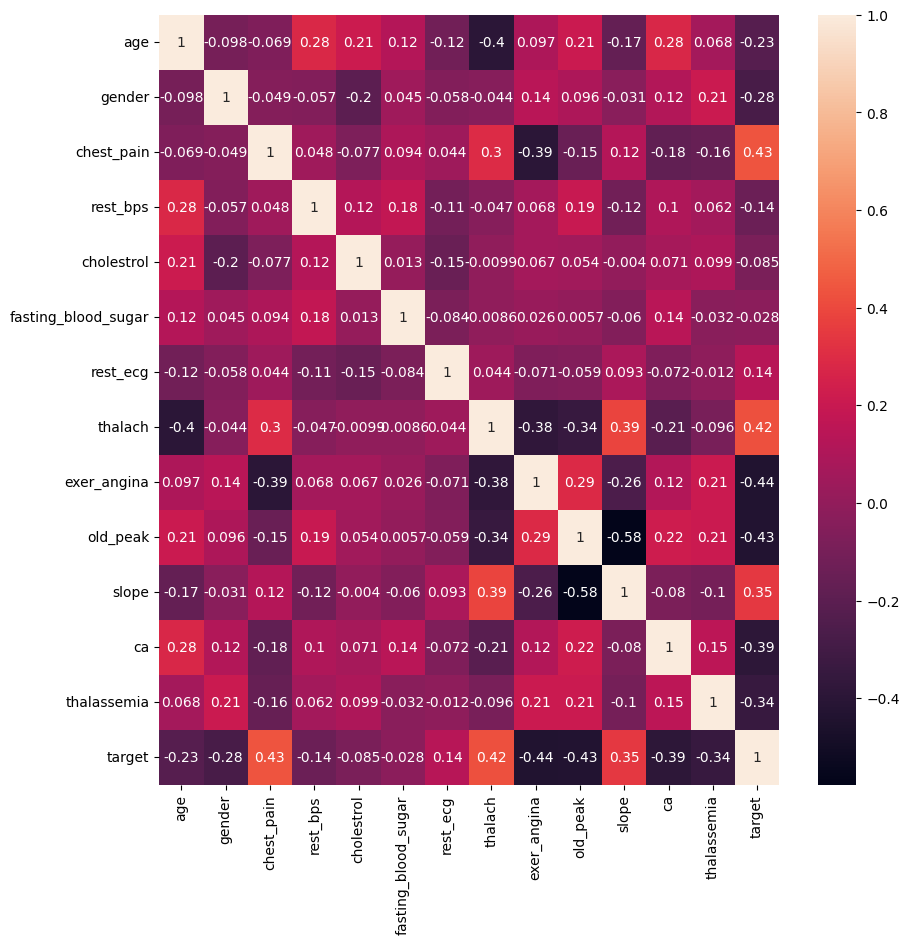

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# machine Model Training

In [ ]:
x = df.drop(['target'],axis=1)
y=df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test

(     age  gender  chest_pain  rest_bps  cholestrol  fasting_blood_sugar  \
 132   42       1           1       120         295                    0   
 202   58       1           0       150         270                    0   
 196   46       1           2       150         231                    0   
 75    55       0           1       135         250                    0   
 176   60       1           0       117         230                    1   
 ..   ...     ...         ...       ...         ...                  ...   
 188   50       1           2       140         233                    0   
 71    51       1           2        94         227                    0   
 106   69       1           3       160         234                    1   
 270   46       1           0       120         249                    0   
 102   63       0           1       140         195                    0   
 
      rest_ecg  thalach  exer_angina  old_peak  slope  ca  thalassemia  
 132         

# Logisitic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

from sklearn.model_selection import train_test_split

In [ ]:
model  = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
cfm=confusion_matrix(y_test,y_pred)
classreport=classification_report(y_test,y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy",accuracy)
print("confusion matrix",cfm)
print("Precision :",precision)
print("Recall :",recall)
print("classification report",classreport)
print("Training score:",model.score(x_train,y_train))
print('Testing score:',model.score(x_test,y_test))
print("Kappa score:",cohen_kappa_score(y_test, y_pred))

Accuracy 0.8852459016393442
confusion matrix [[25  4]
 [ 3 29]]
Precision : 0.8787878787878788
Recall : 0.90625
classification report               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Training score: 0.8553719008264463
Testing score: 0.8852459016393442
Kappa score: 0.7695628710199676


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [ ]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
accuracy1=accuracy_score(y_test,y_pred1)
cfm1=confusion_matrix(y_test,y_pred1)
classreport1=classification_report(y_test,y_pred1)
recall1 = recall_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
print("Accuracy",accuracy1)
print("confusion matrix",cfm1)
print("Precision :",precision1)
print("Recall :",recall1)
print("classification report",classreport1)
print("Training score:",model1.score(x_train,y_train))
print('Testing score:',model1.score(x_test,y_test))
print("Kappa score:",cohen_kappa_score(y_test, y_pred1))

Accuracy 0.8360655737704918
confusion matrix [[26  3]
 [ 7 25]]
Precision : 0.8928571428571429
Recall : 0.78125
classification report               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Training score: 1.0
Testing score: 0.8360655737704918
Kappa score: 0.6734475374732334


# Random Forest   

In [ ]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
accuracy2=accuracy_score(y_test,y_pred2)
cfm2=confusion_matrix(y_test,y_pred2)
classreport2=classification_report(y_test,y_pred2)
recall2 = recall_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
print("Accuracy",accuracy2)
print("confusion matrix",cfm2)
print("Precision :",precision2)
print("Recall :",recall2)
print("classification report",classreport2)
print("Training score:",model2.score(x_train,y_train))
print('Testing score:',model1.score(x_test,y_test))
print("Kappa score:",cohen_kappa_score(y_test, y_pred2))

Accuracy 0.8688524590163934
confusion matrix [[24  5]
 [ 3 29]]
Precision : 0.8529411764705882
Recall : 0.90625
classification report               precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Training score: 1.0
Testing score: 0.8360655737704918
Kappa score: 0.7362162162162162


# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model3=GradientBoostingClassifier()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
accuracy3=accuracy_score(y_test,y_pred3)
cfm3=confusion_matrix(y_test,y_pred3)
classreport3=classification_report(y_test,y_pred3)
recall3 = recall_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
print("Accuracy",accuracy3)
print("confusion matrix",cfm3)
print("Precision :",precision3)
print("Recall :",recall3)
print("classification report",classreport3)
print("Training score:",model3.score(x_train,y_train))
print('Testing score:',model3.score(x_test,y_test))
print("Kappa score:",cohen_kappa_score(y_test, y_pred3))

Accuracy 0.7704918032786885
confusion matrix [[23  6]
 [ 8 24]]
Precision : 0.8
Recall : 0.75
classification report               precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.80      0.75      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

Training score: 1.0
Testing score: 0.7704918032786885
Kappa score: 0.5413533834586466


#  AdaBoostClassifier

In [ ]:
model4 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500, subsample=0.5, random_state=10)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
accuracy4 = accuracy_score(y_test, y_pred4)
cfm4 = confusion_matrix(y_test, y_pred4)
classreport4 = classification_report(y_test, y_pred4)
recall4 = recall_score(y_test, y_pred4)
precision4 = precision_score(y_test, y_pred4)
print("Accuracy", accuracy4)
print("confusion matrix", cfm4)
print("Precision :", precision4)
print("Recall :", recall4)
print("classification report", classreport4)
print("Training score:", model4.score(x_train, y_train))
print('Testing score:', model4.score(x_test, y_test))
print("Kappa score:", cohen_kappa_score(y_test, y_pred4))

Accuracy 0.8524590163934426
confusion matrix [[25  4]
 [ 5 27]]
Precision : 0.8709677419354839
Recall : 0.84375
classification report               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Training score: 1.0
Testing score: 0.8524590163934426
Kappa score: 0.7046799354491662


# xgb.XGBClassifier

In [ ]:
model5 = xgb.XGBClassifier(learning_rate=0.1, n_estimators=500, subsample=0.5, random_state=10)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
accuracy5 = accuracy_score(y_test, y_pred5)
cfm5 = confusion_matrix(y_test, y_pred5)
classreport5 = classification_report(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)
precision5 = precision_score(y_test, y_pred5)
print("Accuracy", accuracy5)
print("confusion matrix", cfm5)
print("Precision :", precision5)
print("Recall :", recall5)
print("classification report", classreport5)
print("Training score:", model5.score(x_train, y_train))
print('Testing score:', model5.score(x_test, y_test))
print("Kappa score:", cohen_kappa_score(y_test, y_pred5))

Accuracy 0.8524590163934426
confusion matrix [[25  4]
 [ 5 27]]
Precision : 0.8709677419354839
Recall : 0.84375
classification report               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Training score: 1.0
Testing score: 0.8524590163934426
Kappa score: 0.7046799354491662


# catboost Classifier

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
model6 = CatBoostClassifier(learning_rate=0.1, n_estimators=500, subsample=0.5, random_state=10)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
accuracy6 = accuracy_score(y_test, y_pred6)
cfm6 = confusion_matrix(y_test, y_pred6)
classreport6 = classification_report(y_test, y_pred6)
recall6 = recall_score(y_test, y_pred6)
precision6 = precision_score(y_test, y_pred6)
print("Accuracy", accuracy6)
print("confusion matrix", cfm6)
print("Precision :", precision6)
print("Recall :", recall6)
print("classification report", classreport6)
print("Training score:", model6.score(x_train, y_train))
print('Testing score:', model6.score(x_test, y_test))
print("Kappa score:", cohen_kappa_score(y_test, y_pred6))

0:	learn: 0.6292063	total: 6.82ms	remaining: 3.4s
1:	learn: 0.5679420	total: 8.48ms	remaining: 2.11s
2:	learn: 0.5229161	total: 9.81ms	remaining: 1.62s
3:	learn: 0.4789023	total: 11.1ms	remaining: 1.37s
4:	learn: 0.4425827	total: 12.3ms	remaining: 1.22s
5:	learn: 0.4155897	total: 13.5ms	remaining: 1.11s
6:	learn: 0.3964624	total: 14.7ms	remaining: 1.04s
7:	learn: 0.3790341	total: 15.9ms	remaining: 978ms
8:	learn: 0.3510948	total: 17.1ms	remaining: 930ms
9:	learn: 0.3377328	total: 18.2ms	remaining: 892ms
10:	learn: 0.3220351	total: 19.4ms	remaining: 861ms
11:	learn: 0.3059821	total: 20.6ms	remaining: 838ms
12:	learn: 0.2903827	total: 21.8ms	remaining: 815ms
13:	learn: 0.2838766	total: 22.9ms	remaining: 796ms
14:	learn: 0.2754118	total: 24.1ms	remaining: 779ms
15:	learn: 0.2649277	total: 25.3ms	remaining: 765ms
16:	learn: 0.2581780	total: 26.6ms	remaining: 755ms
17:	learn: 0.2488869	total: 27.7ms	remaining: 743ms
18:	learn: 0.2414497	total: 28.9ms	remaining: 732ms
19:	learn: 0.2324046	to

# svm

In [ ]:
from sklearn.svm import SVC

model7 = SVC(kernel='linear', C=1.0)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
accuracy7 = accuracy_score(y_test, y_pred7)
cfm7 = confusion_matrix(y_test, y_pred7)
classreport7 = classification_report(y_test, y_pred7)
recall7 = recall_score(y_test, y_pred7)
precision7 = precision_score(y_test, y_pred7)
print("Accuracy", accuracy7)
print("confusion matrix", cfm7)
print("Precision :", precision7)
print("Recall :", recall7)
print("classification report", classreport7)
print("Training score:", model7.score(x_train, y_train))
print('Testing score:', model7.score(x_test, y_test))
print("Kappa score:", cohen_kappa_score(y_test, y_pred7))

Accuracy 0.8688524590163934
confusion matrix [[25  4]
 [ 4 28]]
Precision : 0.875
Recall : 0.875
classification report               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Training score: 0.8636363636363636
Testing score: 0.8688524590163934
Kappa score: 0.7370689655172413


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model8 = GaussianNB()
model8.fit(x_train, y_train)
y_pred8 = model7.predict(x_test)
accuracy8 = accuracy_score(y_test, y_pred8)
cfm8 = confusion_matrix(y_test, y_pred)
classreport8 = classification_report(y_test, y_pred8)
recall8 = recall_score(y_test, y_pred8)
precision8 = precision_score(y_test, y_pred8)
print("Accuracy", accuracy8)
print("confusion matrix", cfm8)
print("Precision :", precision8)
print("Recall :", recall8)
print("classification report", classreport8)
print("Training score:", model7.score(x_train, y_train))
print('Testing score:', model7.score(x_test, y_test))
print("Kappa score:", cohen_kappa_score(y_test, y_pred8))

Accuracy 0.8688524590163934
confusion matrix [[25  4]
 [ 3 29]]
Precision : 0.875
Recall : 0.875
classification report               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Training score: 0.8636363636363636
Testing score: 0.8688524590163934
Kappa score: 0.7370689655172413


#  KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model9 = KNeighborsClassifier()
model9.fit(x_train, y_train)
y_pred9 = model9.predict(x_test)
accuracy9 = accuracy_score(y_test, y_pred9)
cfm9 = confusion_matrix(y_test, y_pred9)
classreport9 = classification_report(y_test, y_pred9)
recall9 = recall_score(y_test, y_pred9)
precision9 = precision_score(y_test, y_pred9)
print("Accuracy", accuracy9)
print("confusion matrix", cfm9)
print("Precision :", precision9)
print("Recall :", recall9)
print("classification report", classreport9)
print("Training score:", model9.score(x_train, y_train))
print('Testing score:', model9.score(x_test, y_test))
print("Kappa score:", cohen_kappa_score(y_test, y_pred9))

Accuracy 0.6885245901639344
confusion matrix [[18 11]
 [ 8 24]]
Precision : 0.6857142857142857
Recall : 0.75
classification report               precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

Training score: 0.7603305785123967
Testing score: 0.6885245901639344
Kappa score: 0.37249593936112624


# hyperparameter tuning Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train, y_train)
accuracy10 = accuracy_score(y_test, best_dt_classifier.predict(x_test))
print("Accuracy:", accuracy10)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.819672131147541


#  Hyperparameter tuning Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(x_train, y_train)
accuracy11 = accuracy_score(y_test, best_rf_classifier.predict(x_test))
print("Accuracy:", accuracy11)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.8688524590163934


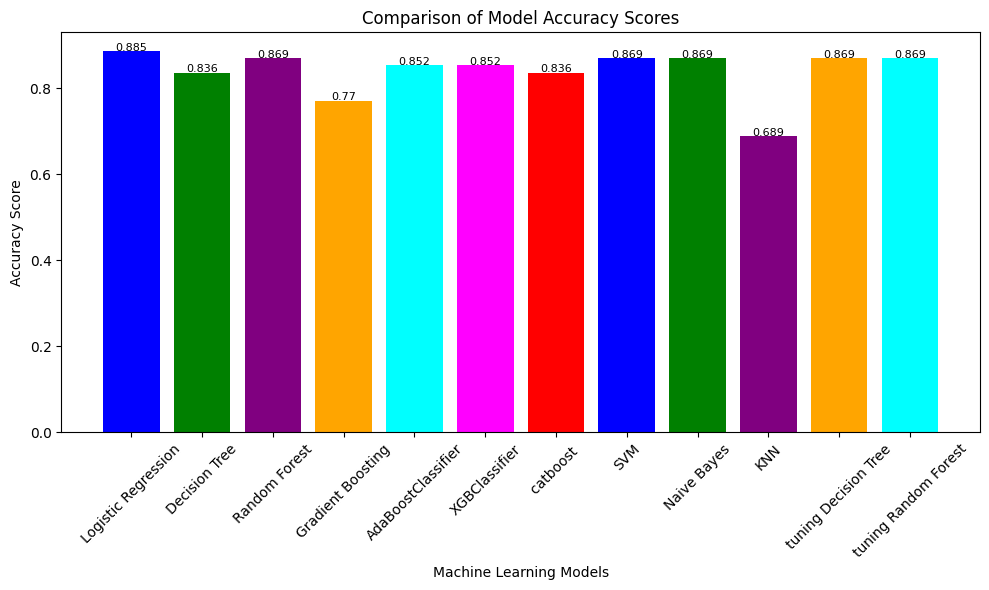

In [ ]:
accuracies = [accuracy, accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8, accuracy9, accuracy10, accuracy11]

# Create a list of model names
model_names = ["Logistic Regression", "Decision Tree", "Random Forest","Gradient Boosting",'AdaBoostClassifier','XGBClassifier','catboost ','SVM','Naive Bayes','KNN','tuning Decision Tree','tuning Random Forest']
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'red']

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()
for bar, score in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(score, 3), ha='center', va='center_baseline', fontsize=8)

In [ ]:
# prompt: show all values of the model

for i, model_name in enumerate(model_names):
  print(f"{i+1}. {model_name}: {accuracies[i]}")


1. Logistic Regression: 0.8852459016393442
2. Decision Tree: 0.8360655737704918
3. Random Forest: 0.8688524590163934
4. Gradient Boosting: 0.7704918032786885
5. AdaBoostClassifier: 0.8524590163934426
6. XGBClassifier: 0.8524590163934426
7. catboost : 0.8360655737704918
8. SVM: 0.8688524590163934
9. Naive Bayes: 0.8688524590163934
10. KNN: 0.6885245901639344
11. tuning Decision Tree: 0.8688524590163934
12. tuning Random Forest: 0.8688524590163934


In [ ]:
df.head(2)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


#  Building a Predictive System get a user from input

In [ ]:
def get_user_input():
    age = int(input("Enter age: "))
    gender = int(input("Enter gender (1 = male, 0 = female): "))
    chest_pain = int(input("Enter chest pain type (0-3) (0 for typical angina, 1 for atypical angina, 2 for non-anginal pain, 3 for asymptomatic): "))
    rest_bps = int(input("Enter resting blood pressure: "))
    cholestrol = int(input("Enter cholesterol level: "))
    fasting_blood_sugar = int(input("Enter fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false): "))
    rest_ecg = int(input("Enter resting electrocardiographic results (0-2) (0 for normal, 1 for ST-T wave abnormality, 2 for left ventricular hypertrophy): "))
    thalach = int(input("Enter maximum heart rate achieved: "))
    exer_angina = int(input("Enter exercise induced angina (1 = yes; 0 = no): "))
    old_peak = float(input("Enter ST depression induced by exercise relative to rest: "))
    slope = int(input("Enter the slope of the peak exercise ST segment (0-2) (0 for upsloping, 1 for flat, 2 for downsloping:): "))
    ca = int(input("Enter number of major vessels colored by fluoroscopy (0-3): "))
    thalassemia = int(input("Enter thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect): "))

    return [[age, gender, chest_pain, rest_bps, cholestrol, fasting_blood_sugar, rest_ecg, thalach, exer_angina, old_peak, slope, ca, thalassemia]]

# Get user input
user_data = get_user_input()

# Make prediction
user_prediction = model.predict(user_data)
user_prediction_proba = model.predict_proba(user_data)

# Display the prediction
print(f'Prediction: {"Heart Attack" if user_prediction[0] == 1 else "No Heart Attack"}')
print(f'Prediction Probability: {user_prediction_proba[0][1] * 100:.2f}% for Heart Attack')

Enter age: 35
Enter gender (1 = male, 0 = female): 1
Enter chest pain type (0-3) (0 for typical angina, 1 for atypical angina, 2 for non-anginal pain, 3 for asymptomatic): 2
Enter resting blood pressure: 200
Enter cholesterol level: 300
Enter fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false): 1
Enter resting electrocardiographic results (0-2) (0 for normal, 1 for ST-T wave abnormality, 2 for left ventricular hypertrophy): 5
Enter maximum heart rate achieved: 250
Enter exercise induced angina (1 = yes; 0 = no): 1
Enter ST depression induced by exercise relative to rest: 8
Enter the slope of the peak exercise ST segment (0-2) (0 for upsloping, 1 for flat, 2 for downsloping:): 2
Enter number of major vessels colored by fluoroscopy (0-3): 1
Enter thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect): 0
Prediction: Heart Attack
Prediction Probability: 83.93% for Heart Attack


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Conclusion

## This heart attack prediction system serves as a tool to assist individuals in understanding their risk of heart attack based on specific health indicators. It is important to note that this system is not a substitute for professional medical advice. Always consult with a healthcare provider for an accurate diagnosis and treatment plan.